In [1]:
%%time
import malaya

CPU times: user 5.81 s, sys: 1.45 s, total: 7.26 s
Wall time: 12.2 s


In [2]:
string = 'Benda yg SALAH ni, jgn lah didebatkan. Yg SALAH xkan jadi betul. Ingat tu. Mcm mana kesat sekalipun org sampaikan mesej, dan memang benda tu salah, diam je. Xyah nk tunjuk kau open sangat nk tegur cara org lain berdakwah. '
another_string = 'bodoh, dah la gay, sokong lgbt lagi, memang tak guna'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return classes more than 0.5 probability. **Default is False.**

## Load multinomial model

In [20]:
model = malaya.toxic.multinomial()

In [4]:
model.predict(string)

[]

In [5]:
model.predict(string,get_proba=True)

{'toxic': 0.14165235977019472,
 'severe_toxic': 1.9272487152616215e-06,
 'obscene': 0.011323038998473341,
 'threat': 8.249039905334012e-08,
 'insult': 0.008620760536227347,
 'identity_hate': 4.703244329372946e-06}

In [6]:
model.predict(another_string)

['toxic', 'insult']

In [7]:
model.predict(another_string,get_proba=True)

{'toxic': 0.97624511869432,
 'severe_toxic': 0.0004143925305717536,
 'obscene': 0.48936571876841484,
 'threat': 5.809081616106756e-06,
 'insult': 0.7853970362543069,
 'identity_hate': 0.002109806847753244}

In [8]:
model.predict_batch([string,another_string])

[[], ['toxic', 'insult']]

In [9]:
model.predict_batch([string,another_string],get_proba=True)

[{'toxic': 0.14165235977019472,
  'severe_toxic': 1.9272487152616215e-06,
  'obscene': 0.011323038998473341,
  'threat': 8.249039905334012e-08,
  'insult': 0.008620760536227347,
  'identity_hate': 4.703244329372946e-06},
 {'toxic': 0.97624511869432,
  'severe_toxic': 0.0004143925305717536,
  'obscene': 0.48936571876841484,
  'threat': 5.809081616106756e-06,
  'insult': 0.7853970362543069,
  'identity_hate': 0.002109806847753244}]

## Load logistics model

In [21]:
model = malaya.toxic.logistic()

In [11]:
model.predict(string)

[]

In [12]:
model.predict_batch([string,another_string],get_proba=True)

[{'toxic': 0.10299208923447233,
  'severe_toxic': 0.010195223990855215,
  'obscene': 0.04834509566263489,
  'threat': 0.003488478318883341,
  'insult': 0.04528784776538583,
  'identity_hate': 0.011326619000125776},
 {'toxic': 0.6297643126911581,
  'severe_toxic': 0.019551370640497476,
  'obscene': 0.1995748012804703,
  'threat': 0.004014463652898358,
  'insult': 0.3354069432946268,
  'identity_hate': 0.052626041879065236}]

## BERT model

BERT is the best toxicity model in term of accuracy, you can check toxicity accuracy here, https://malaya.readthedocs.io/en/latest/Accuracy.html#toxicity-analysis. Question is, why BERT?

1. Transformer model learn the context of a word based on all of its surroundings (live string), bidirectionally. So it much better understand left and right hand side relationships.
2. Because of transformer able to leverage to context during live string, we dont need to capture available words in this world, instead capture substrings and build the attention after that. BERT will never have Out-Of-Vocab problem.

## List available BERT models

In [13]:
malaya.toxic.available_bert_model()

['multilanguage', 'base', 'small']

## Load BERT models

In [18]:
model = malaya.toxic.bert(model = 'base')

#### Predict single string

In [15]:
model.predict(string, get_proba=True)

{'toxic': 0.23713578,
 'severe_toxic': 5.5959423e-05,
 'obscene': 0.013920558,
 'threat': 0.00026320494,
 'insult': 0.23729119,
 'identity_hate': 0.0065446077}

#### Predict batch of strings

In [16]:
model.predict_batch([string,another_string],get_proba=True)

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(another_string)

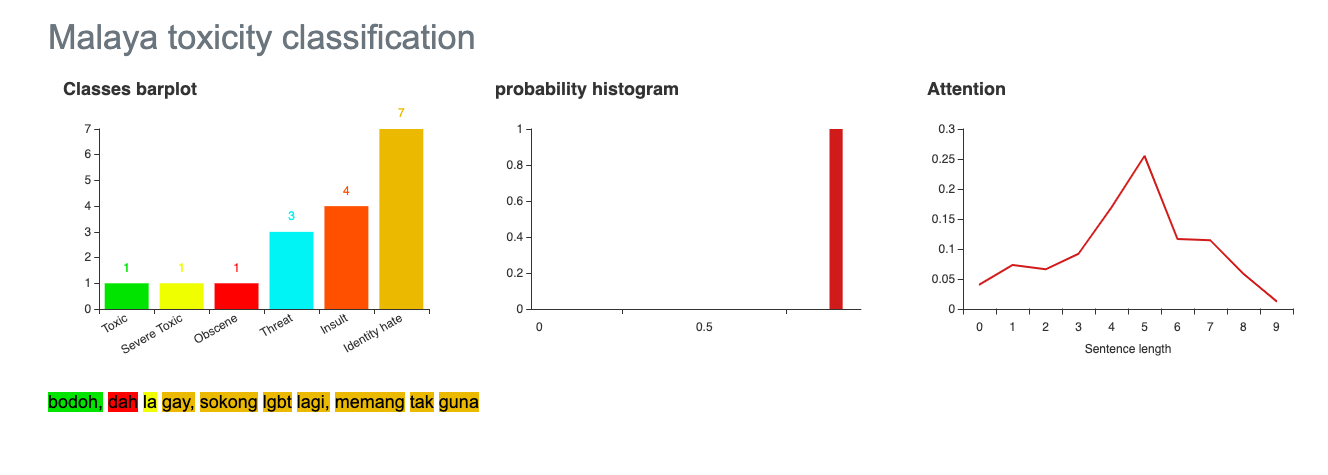

In [19]:
from IPython.core.display import Image, display

display(Image('bert-toxic.png', width=800))

## List available deep learning models

In [13]:
malaya.toxic.available_deep_model()

['self-attention', 'bahdanau', 'luong']

## Load deep learning models

Good thing about deep learning models from Malaya, it returns `Attention` result, means, which part of words give the high impact to the results. But to get `Attention`, you need to set `get_proba=True`.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load bahdanau model

In [15]:
model = malaya.toxic.deep_model(model = 'bahdanau')

#### Predict single string

In [16]:
model.predict(string)

[]

In [17]:
result = model.predict(another_string, get_proba = True)
result

{'toxic': 0.72146016,
 'severe_toxic': 0.15249592,
 'obscene': 0.52586496,
 'threat': 0.080838725,
 'insult': 0.70660627,
 'identity_hate': 0.873813,
 'attention': {'bodoh': 0.10318489,
  ',': 0.0,
  'dah': 0.027627107,
  'la': 0.021338655,
  'gay': 0.49313048,
  'sokong': 0.06966582,
  'lgbt': 0.20966116,
  'lagi': 0.018240018,
  'memang': 0.022205882,
  'tak': 0.017513605,
  'guna': 0.01743243}}

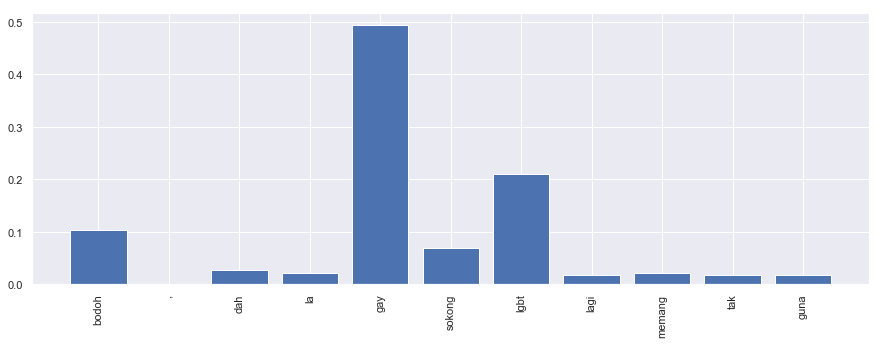

In [18]:
plt.figure(figsize = (15, 5))
keys = result['attention'].keys()
values = result['attention'].values()
aranged = [i for i in range(len(keys))]
plt.bar(aranged, values)
plt.xticks(aranged, keys, rotation = 'vertical')
plt.show()

#### Open toxicity visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(another_string)

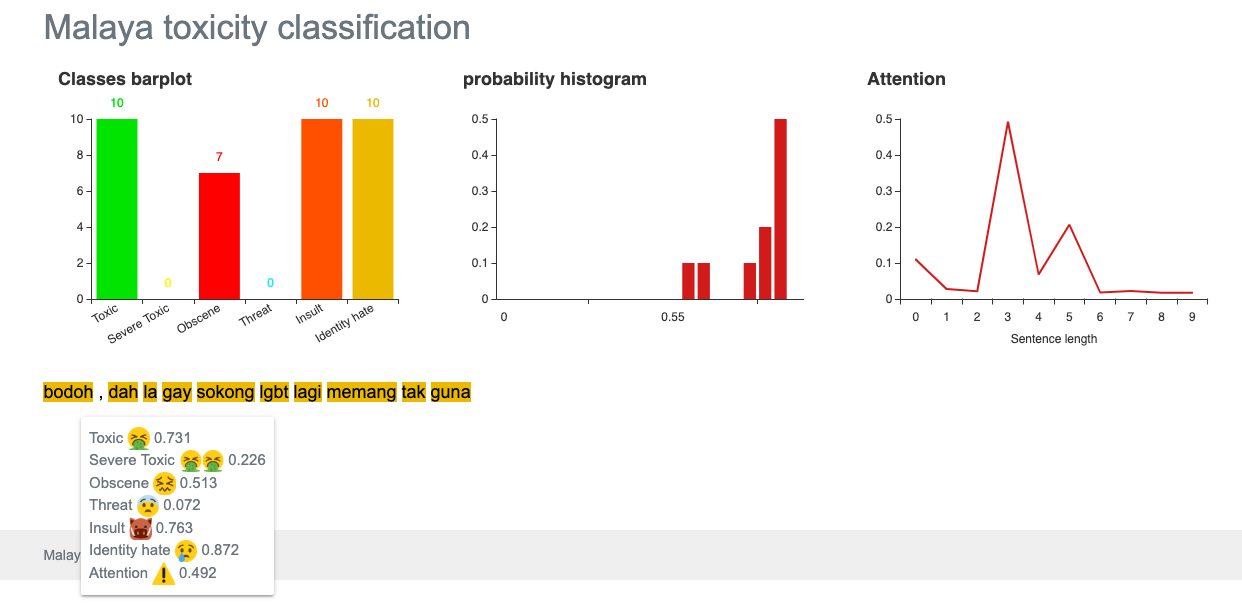

In [21]:
from IPython.core.display import Image, display

display(Image('toxicity.png', width=800))

#### Predict batch of strings

In [22]:
model.predict_batch([string, another_string],get_proba=True)

[{'toxic': 0.20031364,
  'severe_toxic': 0.02258549,
  'obscene': 0.10501574,
  'threat': 0.013459218,
  'insult': 0.10834239,
  'identity_hate': 0.043560036},
 {'toxic': 0.8950191,
  'severe_toxic': 0.14762068,
  'obscene': 0.4691061,
  'threat': 0.3425774,
  'insult': 0.7497996,
  'identity_hate': 0.92953944}]

**You might want to try `luong` and `self-attention` by yourself.**

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [24]:
multinomial = malaya.toxic.multinomial()
logistics = malaya.toxic.logistic()
bahdanau = malaya.toxic.deep_model('bahdanau')

In [23]:
malaya.stack.predict_stack([multinomial, logistics, bahdanau], another_string)

[{'toxic': 0.762428606103178,
  'severe_toxic': 0.011849021176546234,
  'obscene': 0.3832808346427016,
  'threat': 0.0014400114215306784,
  'insult': 0.5784525147196791,
  'identity_hate': 0.04677333735681973}]